In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})

In [187]:
filename = 'perlbench600'
trace_file = 'outputs/' + filename + '_2M.csv'
mplot = filename + '_best_m.png'
lplot = filename + '_best_l.png'
cplot = filename + '_best_c.png'
splot = filename + '_best_s.png'
robplot = filename + '_best_rob.png'
fplot = filename + '_best_f.png'
rplot = filename + '_best_r.png'
results = pd.read_csv(trace_file)
# results = results.iloc[:,:-3]
results.head()

,C,A,M,L,Scheduling_Units,Rob_Entries,Fetch_Width,Retire_Width,Cycles,Interrupts,...,dcache_read_aat,no_fire_cycles,rob_stall_cycles,dispq_max_usage,dispq_avg_usage,schedq_max_usage,schedq_avg_usage,rob_max_usage,rob_avg_usage,IPC
0,15,3,2,3,4,96,5,7,541864,62,...,1.216023,2067,13296,20299,5826.622885,32,31.768100,96,27.081491,3.677329
1,15,3,2,3,4,96,5,6,542076,62,...,1.216037,2068,19213,20299,5833.796517,32,31.700793,96,29.116963,3.675890
2,15,3,2,3,4,96,5,5,543813,62,...,1.215984,2030,51774,20299,5901.075121,32,31.160621,96,35.369695,3.664149
3,15,3,2,3,4,80,5,7,544085,62,...,1.216041,2221,44120,20422,5918.919237,32,31.321442,80,26.286496,3.662317
4,15,3,2,3,4,80,5,6,544562,62,...,1.216011,2223,57325,20477,5937.139890,32,31.139925,80,28.046757,3.659110


In [188]:
results.columns

Index(['C', 'A', 'M', 'L', 'Scheduling_Units', 'Rob_Entries', 'Fetch_Width',
       'Retire_Width', 'Cycles', 'Interrupts', 'arf_writes', 'dcache_reads',
       'dcache_read_misses', 'dcache_read_miss_ratio', 'dcache_read_aat',
       'no_fire_cycles', 'rob_stall_cycles', 'dispq_max_usage',
       'dispq_avg_usage', 'schedq_max_usage', 'schedq_avg_usage',
       'rob_max_usage', 'rob_avg_usage', 'IPC'],
      dtype='object')

In [189]:
filtered_results = results[results['IPC'] >= 0.9*results['IPC'].max()]
filtered_results

,C,A,M,L,Scheduling_Units,Rob_Entries,Fetch_Width,Retire_Width,Cycles,Interrupts,...,dcache_read_aat,no_fire_cycles,rob_stall_cycles,dispq_max_usage,dispq_avg_usage,schedq_max_usage,schedq_avg_usage,rob_max_usage,rob_avg_usage,IPC
0,15,3,2,3,4,96,5,7,541864,62,...,1.216023,2067,13296,20299,5826.622885,32,31.768100,96,27.081491,3.677329
1,15,3,2,3,4,96,5,6,542076,62,...,1.216037,2068,19213,20299,5833.796517,32,31.700793,96,29.116963,3.675890
2,15,3,2,3,4,96,5,5,543813,62,...,1.215984,2030,51774,20299,5901.075121,32,31.160621,96,35.369695,3.664149
3,15,3,2,3,4,80,5,7,544085,62,...,1.216041,2221,44120,20422,5918.919237,32,31.321442,80,26.286496,3.662317
4,15,3,2,3,4,80,5,6,544562,62,...,1.216011,2223,57325,20477,5937.139890,32,31.139925,80,28.046757,3.659110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,14,3,1,3,3,64,5,6,601617,62,...,1.336673,16700,17514,26622,8241.686418,21,20.802547,64,19.510203,3.312094
193,15,3,2,3,2,80,4,5,601678,62,...,1.216027,8180,668,20952,3419.590670,16,15.936619,79,17.045150,3.311758
194,15,3,2,3,2,64,4,6,601786,62,...,1.216051,8263,977,20952,3423.311795,16,15.932386,64,14.322595,3.311164
195,15,3,2,3,2,64,4,5,602020,62,...,1.216027,8269,3694,20952,3429.135552,16,15.921386,64,16.952653,3.309877


In [190]:
results_best_l = filtered_results.groupby(['L']).agg({'IPC': ['count', 'mean', 'min', 'max']})

In [191]:
threshold = 0.9*results['IPC'].max()
threshold

3.3095961

In [192]:
results_best_l

IPC                              
  count      mean       min       max
L                                    
3   197  3.443397  3.309866  3.677329

In [193]:
results_best_m = filtered_results.groupby(['M']).agg({'IPC': ['count', 'mean', 'min', 'max']})
results_best_m

IPC                              
  count      mean       min       max
M                                    
1    85  3.443224  3.312094  3.622127
2   112  3.443528  3.309866  3.677329

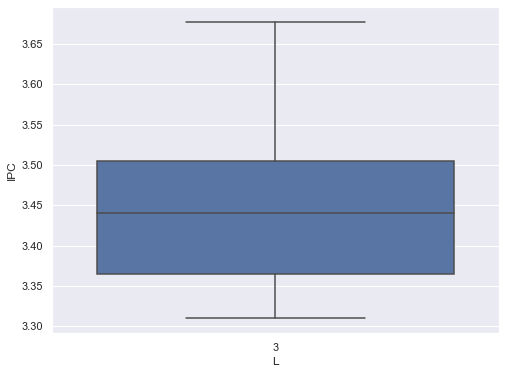

In [194]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x="L", y="IPC", data=filtered_results)
# ax.set_ylim(0)
plt.show()

ValueError: min() arg is an empty sequence

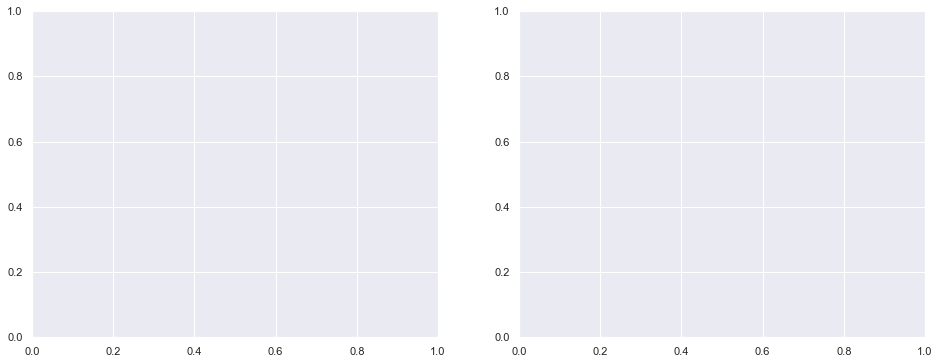

In [184]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(ax = ax[0], x="Scheduling_Units", y="IPC", data=filtered_results[filtered_results["L"] == 2])
# plt.show()
sns.boxplot(ax = ax[1], x="Rob_Entries", y="IPC", data=filtered_results[filtered_results["L"] == 2])
# ax.set_ylim(0)
plt.show()

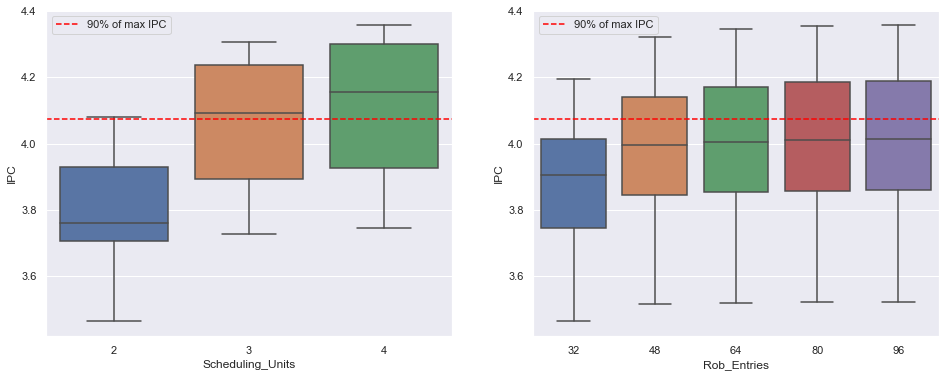

In [49]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(ax = ax[0], x="Scheduling_Units", y="IPC", data=results[results["L"] == 2])
ax[0].axhline(threshold, color='red',linestyle='dashed', label="90% of max IPC")
ax[0].legend()
# plt.show()
sns.boxplot(ax = ax[1], x="Rob_Entries", y="IPC", data=results[results["L"] == 2])
ax[1].axhline(threshold, color='red',linestyle='dashed', label="90% of max IPC")
# ax.set_ylim(0)
ax[1].legend()
plt.show()

In [195]:
plot_columns = ['C', 'M', 'L', 'Scheduling_Units', 'Rob_Entries', 'Fetch_Width',
       'Retire_Width']
def make_boxplots(data, metric="IPC"):
    # columns = [c for c in plot_columns if c != column]
    fig, ax = plt.subplots(4,2,figsize=(14,24))
    fig.delaxes(ax[3,1])
    # fig.delaxes(ax[2,0])
    # axes = ax
    # del ax[2,2]
    # del ax[2,0]
    valid_axes = ax.flat[[0,1,2,3,4,5,6]]
    for i, c in enumerate(plot_columns):
        axis = valid_axes.flat[i]
        sns.boxplot(ax = axis, x=c, y=metric, data=data)
        if metric == "IPC":
            axis.axhline(threshold, color='red',linestyle='dashed', label="90% of max IPC")
        else:
            median = data[metric].median()
            # ax.set_ylim(0)
            axis.axhline(median, color='red',linestyle='dashed', label="Median of "+ metric)
        axis.legend()

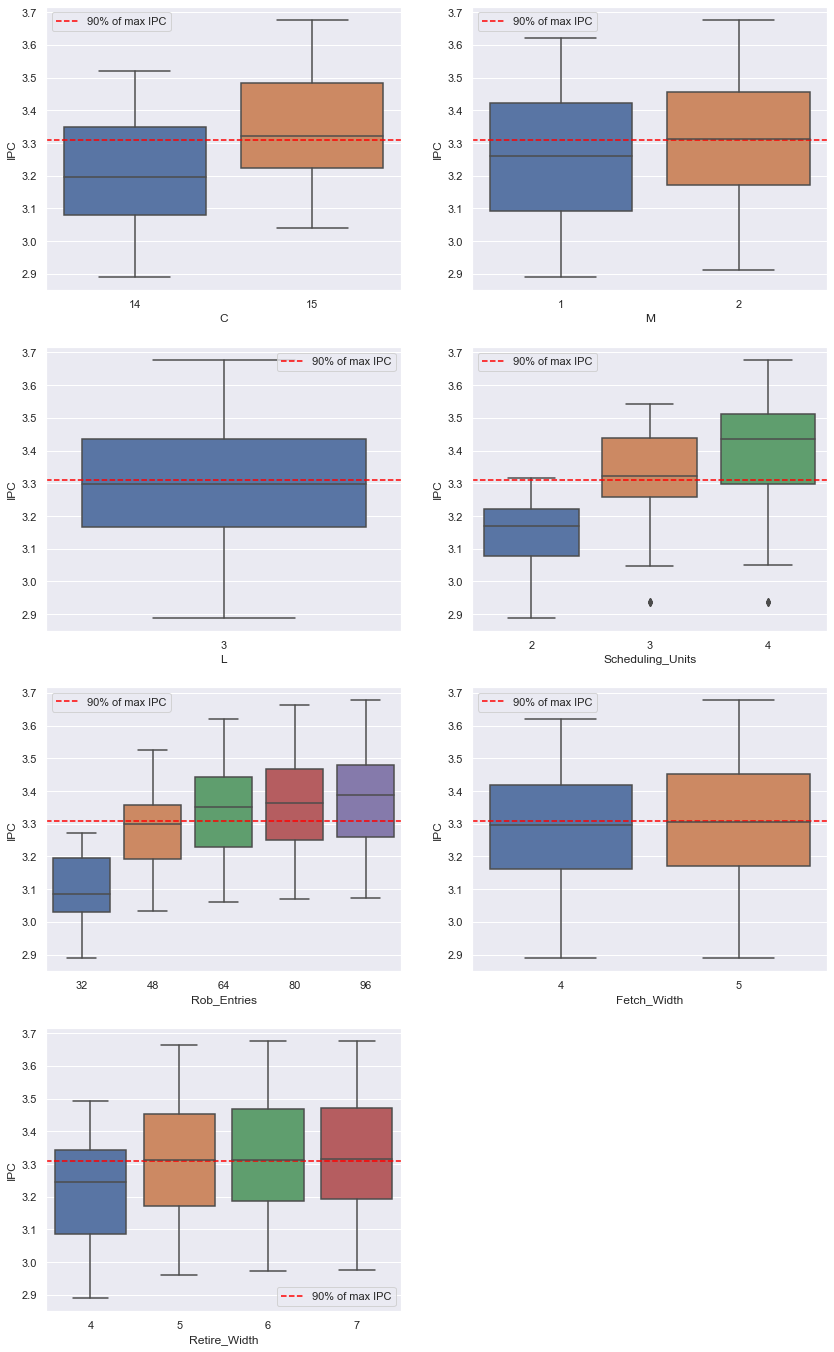

In [196]:
make_boxplots(results)

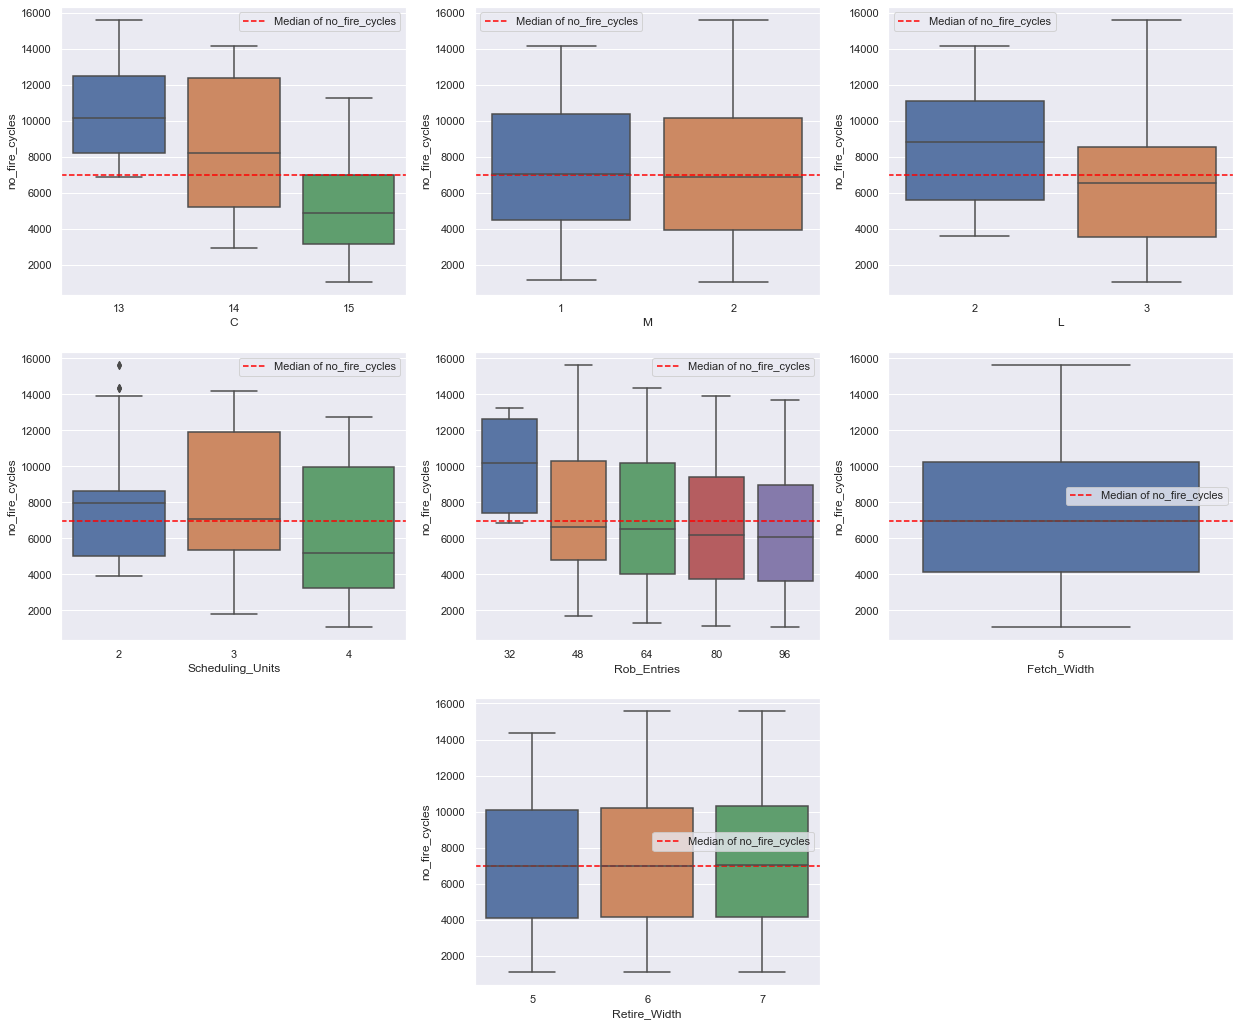

In [114]:
make_boxplots(filtered_results, "no_fire_cycles")

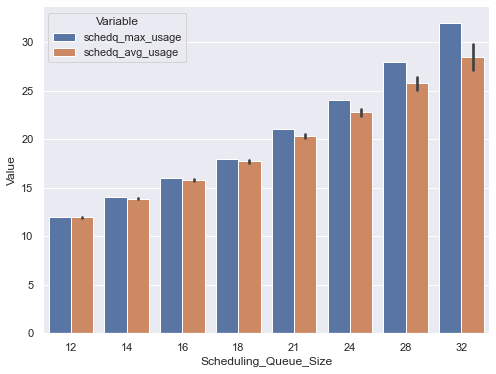

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
results_edit = results.copy()
results_edit['Scheduling_Queue_Size'] = results_edit['Scheduling_Units']*(results_edit["A"] + results_edit["M"] + results_edit["L"])
tidy = results_edit.loc[:,['Scheduling_Queue_Size','schedq_max_usage', 'schedq_avg_usage']].melt(id_vars=['Scheduling_Queue_Size']).rename(columns=str.title)
# tidy
# sns.barplot(x='Scheduling_Units', y='Value', hue='Variable', data=tidy, ax=ax)
sns.barplot(x='Scheduling_Queue_Size', y='Value', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)
# g = sns.catplot(
#     data=results, kind="bar",
#     x="Scheduling_Units", y="schedq_avg_usage", hue="",
#     ci="sd", palette="dark", alpha=.6, height=6
# )
# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

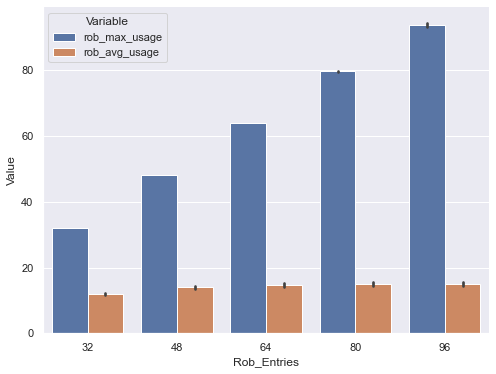

In [135]:
fig, ax = plt.subplots(figsize=(8,6))
# results_edit = results.copy()
# results['ROB_Entries'] = results_edit['ROB_Entries']*(results_edit["A"] + results_edit["M"] + results_edit["L"])
tidy = results.loc[:,['Rob_Entries','rob_max_usage', 'rob_avg_usage']].melt(id_vars=['Rob_Entries']).rename(columns=str.title)
# tidy
# sns.barplot(x='Scheduling_Units', y='Value', hue='Variable', data=tidy, ax=ax)
sns.barplot(x='Rob_Entries', y='Value', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)

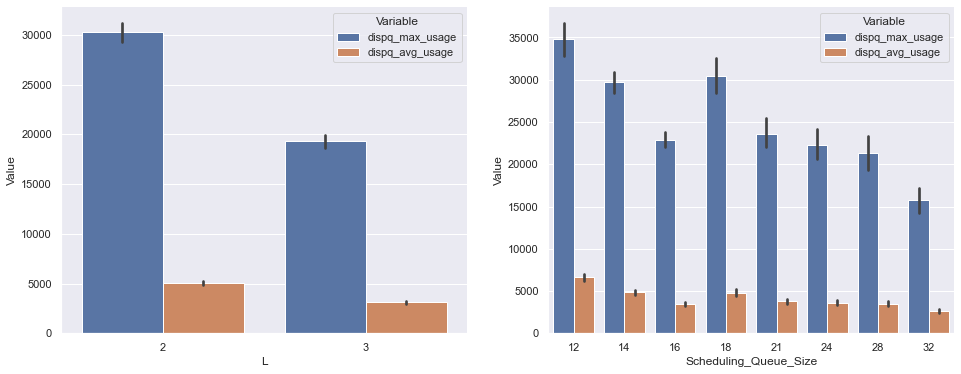

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
results_edit = results.copy()
results_edit['Scheduling_Queue_Size'] = results_edit['Scheduling_Units']*(results_edit["A"] + results_edit["M"] + results_edit["L"])
metrics = ["L", "Scheduling_Queue_Size"]
for i, metric in enumerate(metrics):
    tidy = results_edit.loc[:,[metric,'dispq_max_usage', 'dispq_avg_usage']].melt(id_vars=[metric]).rename(columns=str.title)
    sns.barplot(x=metric, y='Value', hue='Variable', data=tidy, ax=ax.flat[i])
sns.despine(fig)

# results_edit = results.copy()
# results['ROB_Entries'] = results_edit['ROB_Entries']*(results_edit["A"] + results_edit["M"] + results_edit["L"])


In [ ]:
def check_max_usage(data, analysis_metric):

    
    # if metric == "S":

    # columns = [c for c in plot_columns if c != column]
    fig, ax = plt.subplots(3,3,figsize=(21,18))
    fig.delaxes(ax[2,2])
    fig.delaxes(ax[2,0])
    # axes = ax
    # del ax[2,2]
    # del ax[2,0]
    valid_axes = ax.flat[[0,1,2,3,4,5,7]]
    for i, c in enumerate(plot_columns):
        axis = valid_axes.flat[i]
        sns.boxplot(ax = axis, x=c, y=metric, data=data)
        median = data[metric].median()
        # ax.set_ylim(0)
        axis.axhline(median, color='red',linestyle='dashed', label="Median of "+ metric)
        axis.legend()


In [100]:
#Best config
results[(results["C"] == 14) & (results["L"] == 3) & (results["M"] == 1) & (results["Retire_Width"] == 5) & (results["Rob_Entries"] == 48) & (results["Scheduling_Units"] == 2)].T

,318
C,1.400000e+01
A,3.000000e+00
M,1.000000e+00
L,3.000000e+00
Scheduling_Units,2.000000e+00
Rob_Entries,4.800000e+01
Fetch_Width,5.000000e+00
Retire_Width,5.000000e+00
Cycles,4.838190e+05
Interrupts,6.200000e+01


In [106]:
results[(results["C"] == 14) & (results["L"] == 2) & (results["M"] == 1) & (results["Retire_Width"] == 5) & (results["Rob_Entries"] == 64) & (results["Scheduling_Units"] == 3)].T

,66
C,1.400000e+01
A,3.000000e+00
M,1.000000e+00
L,2.000000e+00
Scheduling_Units,3.000000e+00
Rob_Entries,6.400000e+01
Fetch_Width,5.000000e+00
Retire_Width,5.000000e+00
Cycles,4.884360e+05
Interrupts,6.200000e+01


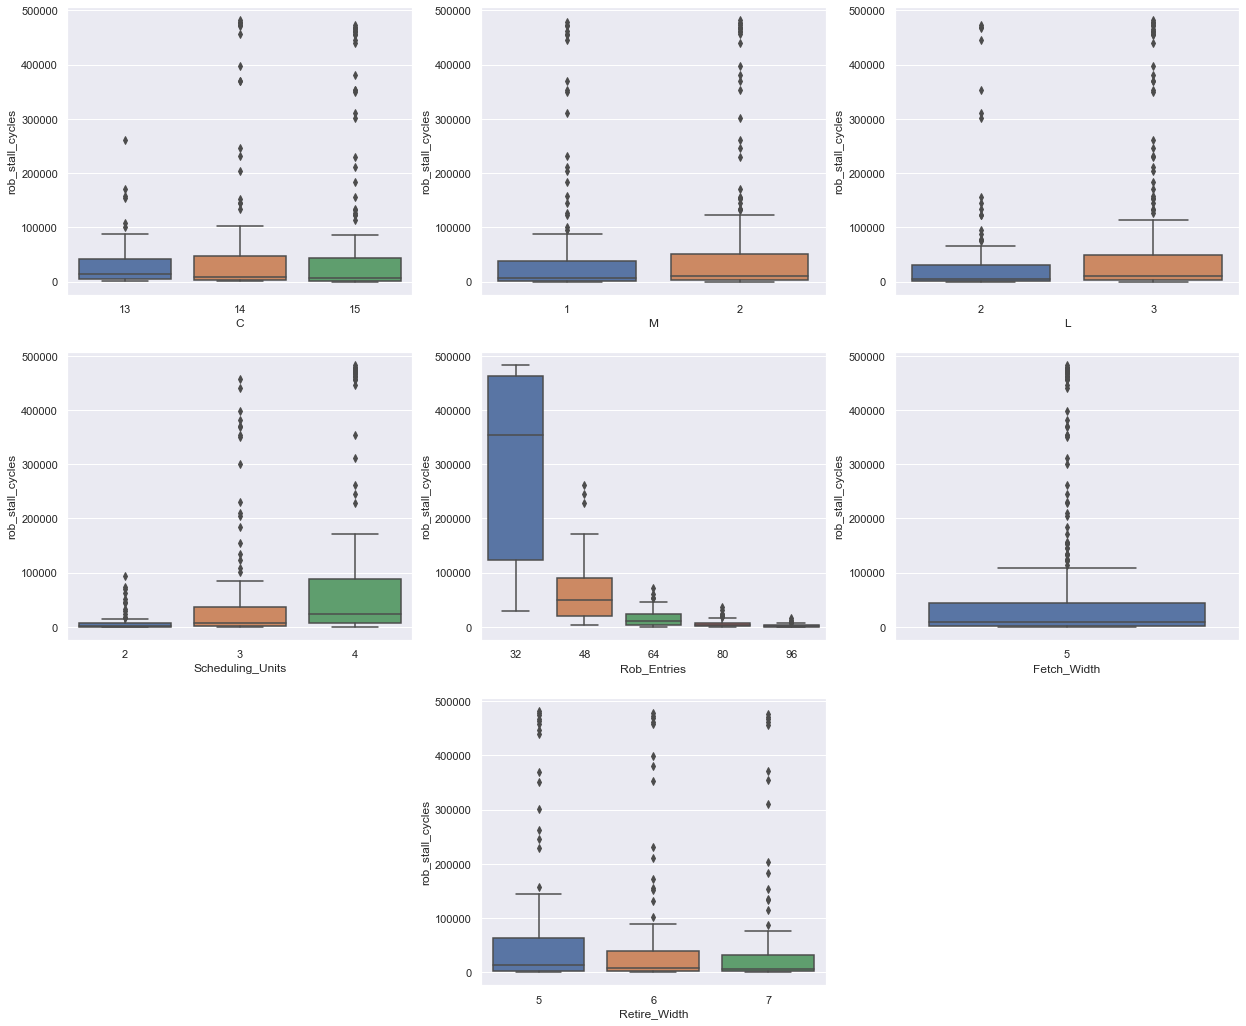

In [88]:
analysis_cols = ["rob_stall_cycles", "no_fire_cycles","dispq_max_usage","dispq_avg_usage","schedq_max_usage","schedq_avg_usage","rob_max_usage","rob_avg_usage"]
x_cols = ["Rob_Entries", "Scheduling_Units","dispq_avg_usage","schedq_max_usage","schedq_avg_usage","Rob_Entries","Rob_Entries"]
def analyze_avg_usage(data):
    fig, ax = plt.subplots(1,1,figsize=(21,18))
    fig.delaxes(ax[2,2])
    fig.delaxes(ax[2,0])
    # axes = ax
    # del ax[2,2]
    # del ax[2,0]
    valid_axes = ax.flat[[0,1,2,3,4,5,7]]
    for i, c in enumerate(plot_columns):
        axis = valid_axes.flat[i]
        sns.boxplot(ax = axis, x=c, y=metric, data=data)
        if metric == "IPC":
            axis.axhline(threshold, color='red',linestyle='dashed', label="90% of max IPC")
            # ax.set_ylim(0)
            axis.legend()

In [107]:
results.agg({'dispq_max_usage': ['count', 'mean', 'min', 'max']})

,dispq_max_usage
count,540.000000
mean,24787.844444
min,10675.000000
max,45565.000000
